# Task- 04

## Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

### Importing libraries and Loading Dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
train_data = pd.read_csv('/content/twitter_training.csv')

In [185]:
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


### Data Preprocessing and Visualization

In [186]:
train_data.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [187]:
train_data.isnull().any()

2401                                                     False
Borderlands                                              False
Positive                                                 False
im getting on borderlands and i will murder you all ,     True
dtype: bool

In [188]:
train_data.dropna(inplace=True)

In [189]:
train_data.isnull().any()

2401                                                     False
Borderlands                                              False
Positive                                                 False
im getting on borderlands and i will murder you all ,    False
dtype: bool

In [191]:
train_data.drop(columns = ['2401', 'Borderlands'], inplace = True)
train_data.rename(columns = {'im getting on borderlands and i will murder you all ,': "Tweets", 'Positive': 'Sentiments'}, inplace = True)

In [192]:
train_data.head()

,Sentiments,Tweets
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [193]:
train_data.shape

(73995, 2)

In [194]:
train_data.drop_duplicates(inplace = True)

In [195]:
train_data.shape

(69768, 2)

In [196]:
train_data.nunique()

Sentiments        4
Tweets        69490
dtype: int64

In [197]:
filtered_train = train_data[train_data.Sentiments != 'Irrelevant']

In [198]:
filtered_train['Sentiments'].value_counts()

Sentiments
Negative    21237
Positive    19137
Neutral     17110
Name: count, dtype: int64

In [199]:
df = filtered_train.groupby('Sentiments').count()
df

,Tweets
Sentiments,
Negative,21237
Neutral,17110
Positive,19137


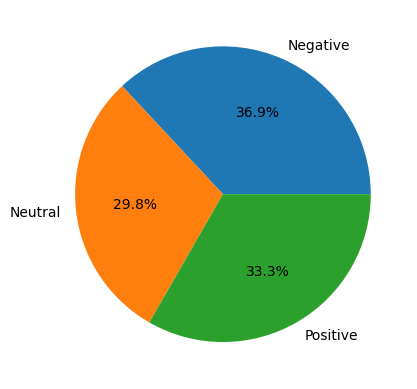

In [200]:
plt.pie(df['Tweets'], labels = df.index, autopct='%1.1f%%')
plt.show()

In [201]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [42]:
# nltk.download('stopwords')
nltk.download('wordnet')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


179

In [202]:
stop_word = list(stopwords.words('english'))
stop_word.extend(['', 'im'])

In [203]:
def deconstruct(text):
    text=re.sub(r"won\'t", "will not", text)
    text=re.sub(r"can\'t", "can not", text)
    text=re.sub(r"n\'t", "not", text)
    return text

In [204]:
lemma = WordNetLemmatizer()
port = PorterStemmer()

In [112]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [205]:
def preprocessing_text(text):
    text=deconstruct(text)   # deconstructing the words like - won't --> will not
    text=re.sub("\S*\d\S*", " ", text).strip()  # Removing the words with numerical digits
    text=re.sub(r"[^A-Za-z]+'", " ", text)  # Replacing non Alphabets with space
    text=text.lower()  # lower case of each data
#     text=correct_text(text)  # Correcting the english spelling of the words
    text=[word for word in text.split(" ") if not word in stop_word]  # Removing the stop word
    text=[lemma.lemmatize(token) for token in text]  # Lemmatization
    text=" ".join(text)   # here we are combing the token/words to form a sentence
    return text

In [206]:
filtered_train["Tweets"]=filtered_train["Tweets"].apply(lambda x: preprocessing_text(x))  # Applying the preprocessing_text function of Text columns to get it clean

<ipython-input-206-59d34080648c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train["Tweets"]=filtered_train["Tweets"].apply(lambda x: preprocessing_text(x))  # Applying the preprocessing_text function of Text columns to get it clean


In [207]:
filtered_train.head()

,Sentiments,Tweets
0,Positive,"coming border kill all,"
1,Positive,"getting borderland kill all,"
2,Positive,"coming borderland murder all,"
3,Positive,"getting borderland murder all,"
4,Positive,"getting borderland murder all,"


In [208]:
filtered_train.groupby('Sentiments').count()

,Tweets
Sentiments,
Negative,21237
Neutral,17110
Positive,19137


In [209]:
# separating the data into different categories
negative=filtered_train[filtered_train["Sentiments"].isin(["Negative"])]
neutral=filtered_train[filtered_train["Sentiments"].isin(["Neutral"])]
positive=filtered_train[filtered_train["Sentiments"].isin(["Positive"])]

In [240]:
# Collecting the samples from each dataset 
p=positive.sample(10000, random_state= 77)
neg=negative.sample(10300, random_state= 77)
neu=neutral.sample(10100, random_state= 77)

In [241]:
# created a sample dataset of the original dataset
sampled_data = pd.concat([p,neg,neu], axis= 0)

In [242]:
sampled_data.isnull().sum()

Sentiments    0
Tweets        0
dtype: int64

In [243]:
sampled_data['Sentiments'].value_counts()

Sentiments
Negative    10300
Neutral     10100
Positive    10000
Name: count, dtype: int64

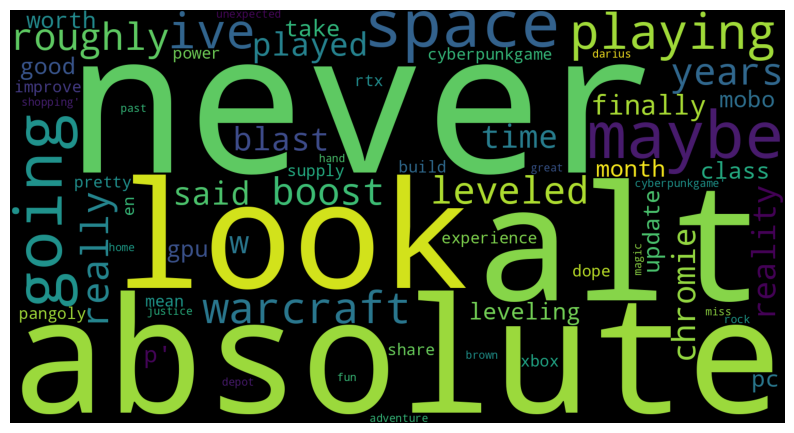

In [244]:

from wordcloud import WordCloud
df1=sampled_data[sampled_data["Sentiments"]=="Positive"]  # filtering the data for positive sentiment
text=df1["Tweets"].values
wc=WordCloud(max_words=2000, width=1500, height=800).generate_from_text(str(text))  # word cloud
plt.figure(figsize=(10,10))  # setting up the dimension of graph
plt.imshow(wc)  # displaying the image( word cloud)
plt.axis("off")  # Hiding the axis value
plt.show()

In [245]:
sampled_data["Sentiments"]=sampled_data["Sentiments"].map({"Positive":2, "Negative":1, "Neutral":0})

### Model Training

In [246]:
x = sampled_data["Tweets"]
y = sampled_data["Sentiments"]

In [247]:
y.isnull().sum()

0

In [248]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.3, random_state=55)

In [249]:
# Tokenizing the words into the arrays as a part of NLP for the machine understanding
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words="english", max_df=0.6, min_df=50, ngram_range=(1,1))

In [250]:
cv.fit(x_train)

CountVectorizer(max_df=0.6, min_df=50, stop_words='english')

In [251]:
cv.get_feature_names_out()

array(['able', 'absolute', 'absolutely', 'access', 'account',
       'achievement', 'action', 'activision', 'actually', 'ad', 'add',
       'ago', 'ai', 'amazing', 'amazon', 'annoying', 'anymore', 'apex',
       'app', 'apple', 'appreciate', 'apps', 'article', 'assassin',
       'auto', 'available', 'away', 'awesome', 'baby', 'bad', 'ball',
       'ban', 'banned', 'based', 'battle', 'battlefield', 'bc', 'beat',
       'beautiful', 'believe', 'best', 'beta', 'better', 'big', 'biggest',
       'birthday', 'bit', 'bitch', 'black', 'blizzard', 'blue', 'book',
       'borderland', 'borderlands', 'bought', 'box', 'boy', 'brand',
       'break', 'breakpoint', 'bring', 'bro', 'broke', 'broken', 'bug',
       'bullshit', 'business', 'buy', 'buying', 'called', 'callofduty',
       'came', 'campaign', 'canada', 'cancer', 'canot', 'car', 'card',
       'care', 'case', 'cause', 'challenge', 'champion', 'chance',
       'change', 'channel', 'character', 'check', 'chinese', 'city',
       'class', 'c

In [252]:
len(cv.get_feature_names_out())

694

In [253]:
# converting the transformed train data into the dataframe
x_train_st=pd.DataFrame(cv.transform(x_train).toarray(), columns=cv.get_feature_names_out())
x_train_st.head(2)

,able,absolute,absolutely,access,account,achievement,action,activision,actually,ad,...,ya,yall,yeah,year,years,yes,yesterday,yo,youtu,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [254]:
x_train_st.shape

(21280, 694)

In [3]:
# converting the transformed test data into the dataframe
x_test_st=pd.DataFrame(cv.transform(x_test).toarray(), columns=cv.get_feature_names_out())
x_test_st.head(2)

In [256]:
x_test_st.shape

(9120, 694)

In [257]:
# Importing the LogisticRegression model
from sklearn.linear_model import LogisticRegression

In [258]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train_st, y_train)

LogisticRegression(max_iter=1000)

In [259]:
# measuring the accuracy of the model
lr.score(x_train_st, y_train)

0.668984962406015

In [260]:
lr.score(x_test_st, y_test)

0.63125

In [261]:
# predicting the train and test data
pred_train=lr.predict(x_train_st)
pred_test=lr.predict(x_test_st)

In [262]:
# calculating the metrics on the train dataset
from sklearn import metrics
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63      7110
           1       0.69      0.71      0.70      7164
           2       0.64      0.71      0.67      7006

    accuracy                           0.67     21280
   macro avg       0.67      0.67      0.67     21280
weighted avg       0.67      0.67      0.67     21280



In [263]:
# calculating the metrics of test dataset
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.63      0.56      0.59      2990
           1       0.66      0.67      0.67      3136
           2       0.60      0.67      0.64      2994

    accuracy                           0.63      9120
   macro avg       0.63      0.63      0.63      9120
weighted avg       0.63      0.63      0.63      9120

